# AI Workshop: Build AI Chatbot

In [ ]:
# python version: =>3.9

# install libraries 
!pip install gradio openai

In [62]:
import gradio as gr
import openai

'''# Generate the key: 
    - Create openAI account & Login: https://platform.openai.com/signup
    - Create API key here: https://platform.openai.com/account/api-keys
    - copy the key and paste it to key.txt file in your local(in same forlder where you have this jupyter notebook file)
    - 
'''
openai.api_key = open("key.txt", "r").read().strip("\n")

#Joke chatbot
# message_history = [{"role": "user", "content": f"You are a joke bot. I will specify the subject matter in my messages, and you will reply with a joke that includes the subjects I mention in my messages. Reply only with jokes to further input. If you understand, say OK."},
#                    {"role": "assistant", "content": f"OK"}]

#Normal chatbot
message_history = [{"role": "user", "content": f""},
                   {"role": "assistant", "content": f"OK"}]

In [63]:
def predict(input):
    # tokenize the new input sentence
    message_history.append({"role": "user", "content": f"{input}"})

    completion = openai.ChatCompletion.create(
      model="gpt-3.5-turbo", #10x cheaper than davinci, and better. $0.002 per 1k tokens
      messages=message_history
    )
    #Just the reply:
    reply_content = completion.choices[0].message.content#.replace('```python', '<pre>').replace('```', '</pre>')

    print(reply_content)
    message_history.append({"role": "assistant", "content": f"{reply_content}"}) 
    
    # get pairs of msg["content"] from message history, skipping the pre-prompt:              here.
    response = [(message_history[i]["content"], message_history[i+1]["content"]) for i in range(2, len(message_history)-1, 2)]  # convert to tuples of list
    return response

In [64]:
# creates a new Blocks app and assigns it to the variable demo.
with gr.Blocks() as demo: 

    # creates a new Chatbot instance and assigns it to the variable chatbot.
    chatbot = gr.Chatbot() 

    # creates a new Row component, which is a container for other components.
    with gr.Row(): 
        '''creates a new Textbox component, which is used to collect user input. 
        The show_label parameter is set to False to hide the label, 
        and the placeholder parameter is set'''
        txt = gr.Textbox(show_label=False, placeholder="Enter text and press enter").style(container=False)
    '''
    sets the submit action of the Textbox to the predict function, 
    which takes the input from the Textbox, the chatbot instance, 
    and the state instance as arguments. 
    This function processes the input and generates a response from the chatbot, 
    which is displayed in the output area.'''
    txt.submit(predict, txt, chatbot) # submit(function, input, output)
    #txt.submit(lambda :"", None, txt)  #Sets submit action to lambda function that returns empty string 

    '''
    sets the submit action of the Textbox to a JavaScript function that returns an empty string. 
    This line is equivalent to the commented out line above, but uses a different implementation. 
    The _js parameter is used to pass a JavaScript function to the submit method.'''
    txt.submit(None, None, txt, _js="() => {''}") # No function, no input to that function, submit action to textbox is a js function that returns empty string, so it clears immediately.
         
demo.launch()

Running on local URL:  http://127.0.0.1:7874

To create a public link, set `share=True` in `launch()`.


Here's the code:

```
print("Hello, World!")
```
Here's a simple Python program that sorts 10 numbers entered by the user:

```
# Get 10 numbers from the user
numbers = []
for i in range(10):
    num = int(input("Enter a number: "))
    numbers.append(num)

# Sort the numbers
numbers.sort()

# Print the sorted list
print("Sorted numbers:")
for num in numbers:
    print(num)
```

In this program, we use a loop to get 10 numbers from the user and append them to a list. We then use the `sort()` method to sort the numbers in ascending order. Finally, we loop through the sorted list and print out each number.


# How chatGTP works

ChatGPT was trained on massive amounts of data that have been gathered from the internet and other sources through 2021, by using Reinforcement Learning from Human Feedback (RLHF).

It first demonstrates data from humans and trains a supervised policy;
The next step is to run the model and let humans manually rank (label) the quality of outputs produced by the model from best to worst, then collect those new feedback data to train a reward model;
Then use a reinforcement learning algorithm (Proximal Policy Optimization) to optimize a policy by training a model against the reward model. (the key phases of RLHF)

ChatGPT is the third version, it is fine-tuned from a model in the GPT3.5 series (a code model) making it more human-like. Read more in the comments.

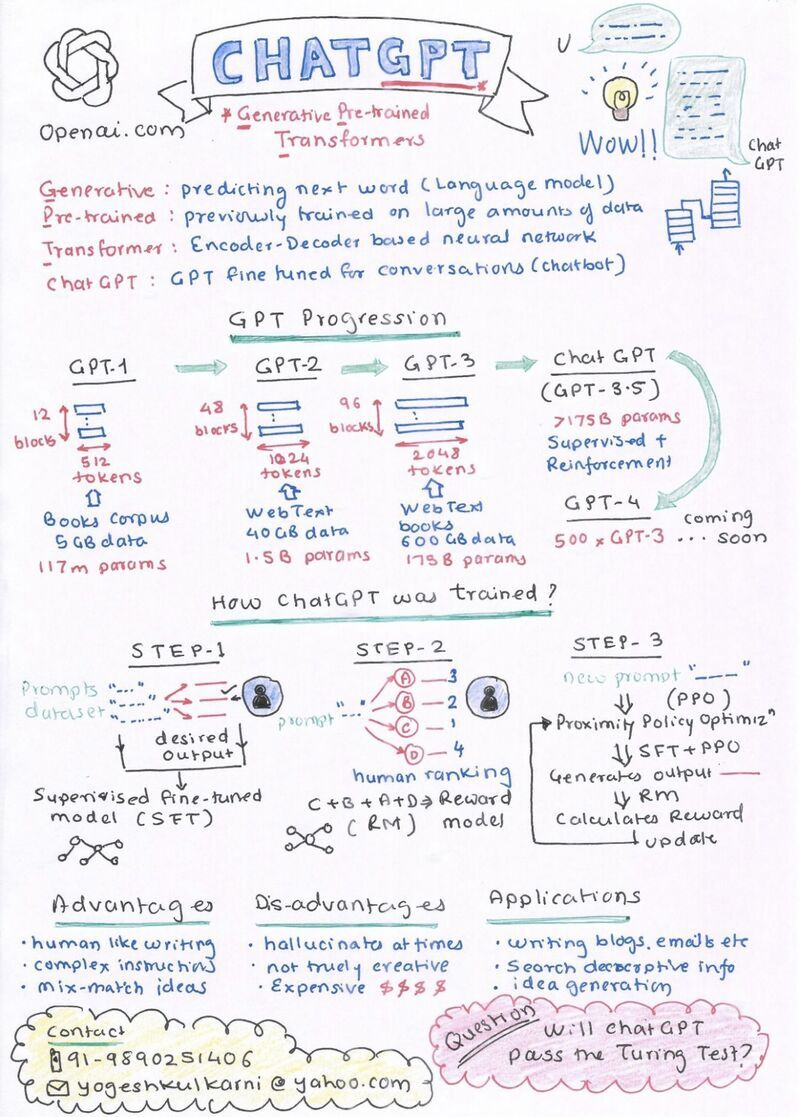!

# How to (actually) use ChatGPT as effectively as possible

In [54]:
from IPython.display import IFrame, display
#filepath = "http://wikipedia.org" # works with websites too!
filepath = "1673357761169.pdf"
IFrame(filepath, width=1000, height=800)

# 16 additional AI tools that can ease your life.

In [53]:
from IPython.display import IFrame, display
#filepath = "http://wikipedia.org" # works with websites too!
filepath = "1675273897539.pdf"
IFrame(filepath, width=1000, height=800)